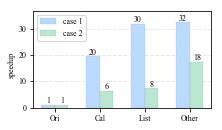

In [2]:
#! /usr/bin/env python# -*- coding: utf-8 -*-
import sys 
reload(sys) 
sys.setdefaultencoding('utf8')
"""
绘制加速比柱状图
Author：shaomingshan
Input：
    version：需要对比的版本
    time：   对应版本的时间
"""


import matplotlib.pyplot as plt
import numpy as np


time1 = [129.177, 6.641, 4.060, 4.000]
time2 = [76.164, 11.930, 10.392, 4.362]
version = ['Ori', 'Cal', 'List', 'Other']
text1 = [1, 20, 30, 32]
text2 = [1, 6, 8, 18]

speedup1 = [0 for i in range(len(time1))]
speedup2 = [0 for j in range(len(time2))]
# 在计算完speedup之后进行log2，然后relabel坐标轴
speedup_map1 = [0 for k in range(len(time1))]
speedup_map2 = [0 for l in range(len(time2))]
# 不保留小数
speedup_num = [1, 20, 30, 32]
speedup_num2 = [1, 6, 8, 18]

# log2
# margin_top = 0.7
margin_top = 4.5
text_gap = 3
# width, height = 3.3, 2.83  # inch
width, height = 3.3, 1.8  # inch
title = u''
xlabel = u''
ylabel = u'speedup'
bar_width = 0.3
text_size = 8
font_size = 8
legend1 = 'case 1'
legend2 = 'case 2'

# color1 = '#9fbfdf'  # 蓝
# color2 = '#b3e5cc'  # 绿
color1 = '#b3d8ff'  # 蓝
color2 = '#b3e5cc'  # 绿
grid_color = '#d9d9d9'
text_color = '#000000'

linewidth = 0.1
edgecolor = "#4d4d4d"


def get_max(data):
    max_num = float('-inf')
    for i in data:
        max_num = i if i > max_num else max_num
    return max_num


def get_min(data):
    min_num = float('inf')
    for i in data:
        min_num = i if i < min_num else min_num
    return min_num


def get_speedup(my_time):
    my_speedup = [0] * len(my_time)
    for i in range(len(my_time)):
        my_speedup[i] = my_time[0] / my_time[i]
    return my_speedup


def log2(my_speedup):
    return np.log2(my_speedup)


def draw(save_path):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

    plt.figure().set_size_inches(width, height)
    plt.subplots_adjust(left=0.15, bottom=0.13)

    left1 = range(len(version))
    left2 = [x + bar_width for x in range(len(version))]
    plt.bar(left1, speedup_map1, width=bar_width, color=color1, alpha=0.9,
            label=legend1, edgecolor=edgecolor, linewidth=linewidth)
    plt.bar(left2, speedup_map2, width=bar_width, color=color2, alpha=0.9,
            label=legend2, edgecolor=edgecolor, linewidth=linewidth)

    # 补-1到0之间gap
    # gap_bar = [-1, -1, -1, -1]
    # plt.bar(left1, gap_bar, width=bar_width, color=color1, alpha=0.9)
    # plt.bar(left2, gap_bar, width=bar_width, color=color2, alpha=0.9)

    for x, y1, y2, v1, v2 in zip(np.arange(len(version)), speedup_map1, speedup_map2, speedup_num, speedup_num2):
        plt.text(x, y1+text_gap, v1, ha='center', va='top', fontsize=text_size, color=text_color)  # 保留两位小数
        plt.text(x+bar_width, y2+text_gap, v2, ha='center', va='top', fontsize=text_size, color=text_color)  # 保留两位小数

    plt.title(title)

    # y label
    plt.text(-0.82, (get_max(speedup_map1) + get_min(speedup_map1) - 0.5) / 2,
             ylabel, ha='center', va='center', fontsize=text_size, rotation=90)

    plt.grid(axis='y', linestyle='--', linewidth=1, c=grid_color, alpha=0.6, zorder=-10)
    # plt.legend(loc='upper left', fontsize=font_size, borderpad=0.35, borderaxespad=0.4,
    #            handlelength=1.7, handleheight=0.6, handletextpad=0.35)
    plt.legend(loc='upper left', fontsize=font_size)
    plt.ylim(0, get_max(speedup_map1) + margin_top)
    # log2
    # plt.yticks([-1, 0, 1, 2, 3, 4, 5], [0.5, 1, 2, 4, 8, 16, 32])
    # non log2
    plt.xticks([index + bar_width/2 for index in left1], version)
    plt.tick_params(labelsize=text_size)

    # Save fig before show()
    plt.savefig(save_path)
    plt.show()


if __name__ == '__main__':
    speedup1 = get_speedup(time1)
    speedup2 = get_speedup(time2)
    print(speedup1)
    print(speedup2)
    # log2
    # speedup_map1 = log2(speedup1)
    # speedup_map2 = log2(speedup2)
    # non log2
    speedup_map1 = speedup1
    speedup_map2 = speedup2

    file = 'speedup.pdf'
    draw(file)
